In [36]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import EarlyStopping
import keras.backend as k
from keras.datasets import mnist

In [2]:
df = pd.read_csv("data/cansim.csv")

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
df['Adjustments'] = pd.to_datetime(df['Adjustments'])+MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


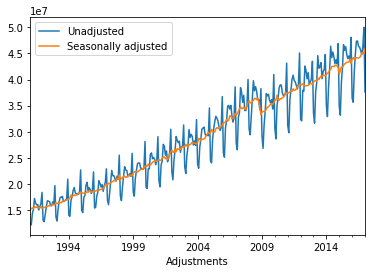

In [5]:
df.plot()

In [6]:
split_date = pd.Timestamp('01-01-2011')

In [7]:
train = df.loc[:split_date,['Unadjusted']]
test = df.loc[split_date:,['Unadjusted']]

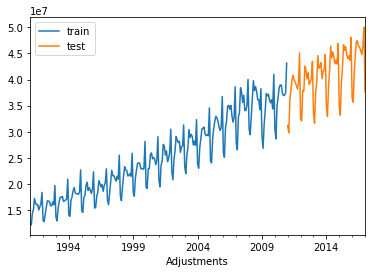

In [8]:
ax= train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [9]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]


In [11]:
model = Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
def predict(model, xtrain,xtest,ytrain,ytest,batch_size = 2):
    k.clear_session()
    early_stop = EarlyStopping(monitor='loss',patience=1,verbose=1)
    model.fit(xtrain,ytrain,epochs=200,batch_size=batch_size,verbose=1,callbacks=[early_stop])
    y_pred = model.predict(xtest)
    plt.plot(ytest)
    plt.plot(y_pred)

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 5/200
120/120 [==============================] - 0s 938us/step - loss: 0.0158
Epoch 6/200
120/120 [==============================] - 0s 825us/step - loss: 0.0143
Epoch 7/200
120/120 [==============================] - 0s 750us/step - loss: 0.0132
Epoch 8/200
120/120 [==============================] - 0s 588us/step - loss: 0.0124
Epoch 9/200
120/120 [==============================] - 0s 683us/step - loss: 0.0119
Epoch 10/200
120/120 [==============================] - 0s 678us/step - loss: 0.0112
Epoch 11/200
120/120 [==============================] - 0s 586us/step - loss: 0.0108
Epoch 12/200
120/120 [==============================] - 0s 609us/step - loss: 0.01

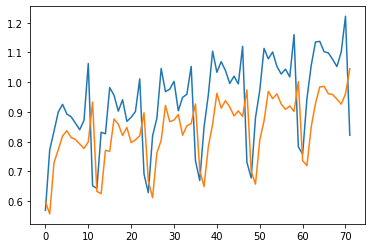

In [13]:
predict(model,X_train,X_test,y_train,y_test)

In [14]:
model = Sequential()
model.add(LSTM(6,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
239/239 [==============================] - 0s 901us/step - loss: 0.0649
Epoch 2/200
239/239 [==============================] - 0s 871us/step - loss: 0.0215
Epoch 3/200
239/239 [==============================] - 0s 858us/step - loss: 0.0167
Epoch 4/200
239/239 [==============================] - 0s 845us/step - loss: 0.0137
Epoch 5/200
239/239 [==============================] - 0s 862us/step - loss: 0.0114
Epoch 6/200
239/239 [==============================] - 0s 871us/step - loss: 0.0105
Epoch 7/200
239/239 [==============================] - 0s 953us/step - loss: 0.0102
Epoch 8/200
239/239 [==============================] - 0s 929us/step - loss: 0.0104
Epoch 00008: early stopping


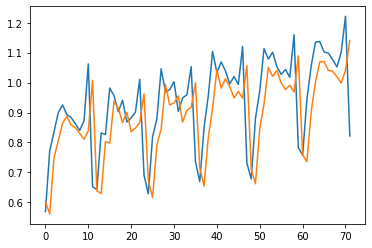

In [15]:
predict(model,X_train[:,None],X_test[:,None],y_train,y_test,1)

In [16]:
train_scaled = pd.DataFrame(train_sc,columns=['scaled'],index=train.index)
test_scaled = pd.DataFrame(test_sc,columns=['scaled'],index=test.index)

In [17]:
for s in range(1,13):
    train_scaled[f"shift_{s}"]=train_scaled['scaled'].shift(s)
    test_scaled[f"shift_{s}"]=test_scaled['scaled'].shift(s)

In [18]:
train_scaled.head(10)

,scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.01402,NaN,NaN,NaN,NaN


In [19]:
X_train = train_scaled.dropna().drop('scaled',axis=1)
y_train = train_scaled.dropna()[['scaled']]
X_test = test_scaled.dropna().drop('scaled',axis=1)
y_test = test_scaled.dropna()[['scaled']]

In [20]:
X_train

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687


In [21]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [22]:
model = Sequential()
model.add(Dense(12,input_dim=12,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
228/228 [==============================] - 0s 544us/step - loss: 0.1254
Epoch 2/200
228/228 [==============================] - 0s 513us/step - loss: 0.0089
Epoch 3/200
228/228 [==============================] - 0s 521us/step - loss: 0.0070
Epoch 4/200
228/228 [==============================] - 0s 660us/step - loss: 0.0063
Epoch 5/200
228/228 [==============================] - 0s 575us/step - loss: 0.0054
Epoch 6/200
228/228 [==============================] - 0s 508us/step - loss: 0.0050
Epoch 7/200
228/228 [==============================] - 0s 552us/step - loss: 0.0041
Epoch 8/200
228/228 [==============================] - 0s 507us/step - loss: 0.0036
Epoch 9/200
228/228 [==============================] - 0s 515us/step - loss: 0.0034
Epoch 10/200
228/228 [==============================] - 0s 527us/step - loss: 0.0032
Epoch 11/200
228/228 [==============================] - 0s 516us/step - loss: 0.0027
Epoch 12/200
228/228 [==============================] - 0s 504us/step - lo

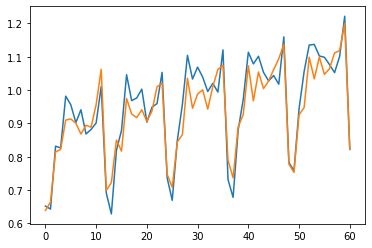

In [23]:
predict(model,X_train,X_test,y_train,y_test,1)

In [24]:
X_train_t = X_train.reshape(X_train.shape[0],1,12)
X_test_t = X_test.reshape(X_test.shape[0],1,12)

In [25]:
X_train_t.shape

(228, 1, 12)

In [26]:
model = Sequential()
model.add(LSTM(6,input_shape=(1,12)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 456       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
228/228 [==============================] - 0s 992us/step - loss: 0.0510
Epoch 2/200
228/228 [==============================] - 0s 856us/step - loss: 0.0082
Epoch 3/200
228/228 [==============================] - 0s 862us/step - loss: 0.0067
Epoch 4/200
228/228 [==============================] - 0s 852us/step - loss: 0.0060
Epoch 5/200
228/228 [==============================] - 0s 877us/step - loss: 0.0055
Epoch 6/200
228/228 [==============================] - 0s 849us/step - loss: 0.0052
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 8/200
228/228 [==============================] - 0s 934us/step - loss: 0.0043
Epoch 9/200
228/228 [==============================] - 0s 842us/step - loss: 0.0038
Epoch 10/200
228/228 [==============================] - 0s 843us/step - loss: 0.0035
Epoch 11/200
228/228 [==============================] - 0s 847us/step - loss: 0.0030
Epoch 12/200
228/228 [==============================] - 0s 926us/step - loss

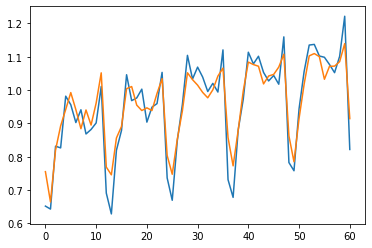

In [27]:
predict(model,X_train_t,X_test_t,y_train,y_test,1)

In [28]:
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

In [29]:
model = Sequential()
model.add(LSTM(6,input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0716
Epoch 2/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 3/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 4/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 5/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0073
Epoch 6/200
228/228 [==============================] - 1s 3ms/step - loss: 0.0073
Epoch 00006: early stopping


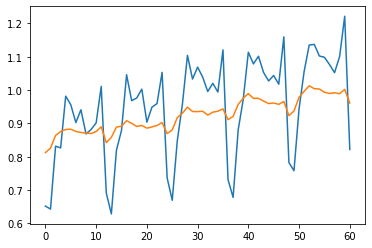

In [30]:
predict(model,X_train_t,X_test_t,y_train,y_test,1)

Epoch 1/50
228/228 [==============================] - 1s 3ms/step - loss: 9.2663e-04
Epoch 2/50
228/228 [==============================] - 1s 2ms/step - loss: 8.9817e-04
Epoch 3/50
228/228 [==============================] - 1s 2ms/step - loss: 9.1899e-04
Epoch 4/50
228/228 [==============================] - 1s 2ms/step - loss: 9.1114e-04
Epoch 5/50
228/228 [==============================] - 1s 3ms/step - loss: 8.8182e-04
Epoch 6/50
228/228 [==============================] - 1s 2ms/step - loss: 9.3905e-04
Epoch 7/50
228/228 [==============================] - 1s 2ms/step - loss: 9.6307e-04
Epoch 8/50
228/228 [==============================] - 1s 3ms/step - loss: 9.3372e-04
Epoch 9/50
228/228 [==============================] - 1s 3ms/step - loss: 9.2613e-04
Epoch 10/50
228/228 [==============================] - 1s 3ms/step - loss: 9.0891e-04
Epoch 11/50
228/228 [==============================] - 1s 3ms/step - loss: 9.3973e-04
Epoch 12/50
228/228 [==============================] - 1s 3ms/s

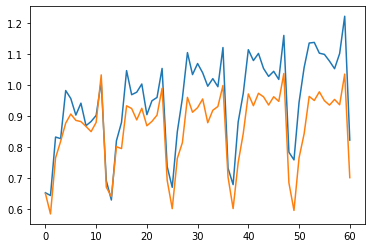

In [34]:
k.clear_session()
model.fit(X_train_t,y_train,epochs=50,batch_size=1,verbose=1)
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data("/tmp/mnist.npz")

11493376/11490434 [==============================] - 1s 0us/step


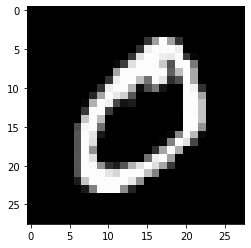

In [38]:
plt.imshow(X_train[1],cmap='gray')

In [39]:
X_train = X_train.reshape(-1, 28*28,1).astype('float32')/255.0
X_test = X_test.reshape(-1, 28*28,1).astype('float32')/255.0

In [40]:
model = Sequential()
model.add(LSTM(6,input_shape=(784,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
469/469 [==============================] - 96s 205ms/step - loss: 8.4345
Epoch 2/200
469/469 [==============================] - 102s 217ms/step - loss: 8.3477
Epoch 3/200
469/469 [==============================] - 97s 206ms/step - loss: 8.3482
Epoch 00003: early stopping


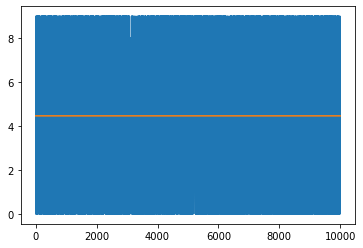

In [42]:
predict(model,X_train,X_test,y_train,y_test,128)